In [102]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt 
import seaborn as sns

### Data Visualisation

In [103]:
dataset = pd.read_csv('CC GENERAL.csv',index_col='CUST_ID')
#The first line of the code dataset.drop_duplicates(inplace=True) is removing duplicate rows from the dataset. This is achieved using the drop_duplicates() function from the Pandas library. The inplace=True parameter specifies that the original dataset should be modified, rather than creating a new copy. 
dataset.drop_duplicates(inplace=True)

In [104]:
dataset.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [105]:
# le résumer statistique du Data Sets avec une interprétation des résultats obtenues:
print(dataset.describe())
print('\n interpretation : For each variable, the summary provides several statistical measures, including count (number of non-missing values), mean (average), standard deviation (measure of the spread of the data), minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum. \n For example, we can see that the average balance is 1564.47, with a standard deviation of 2081.53. The minimum balance is 0, and the maximum is 19043.14. Similarly, we can see the average purchases made by customers is 1003.20, with a standard deviation of 2136.63. The minimum and maximum purchase amounts are 0 and 49039.57, respectively.')

            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000

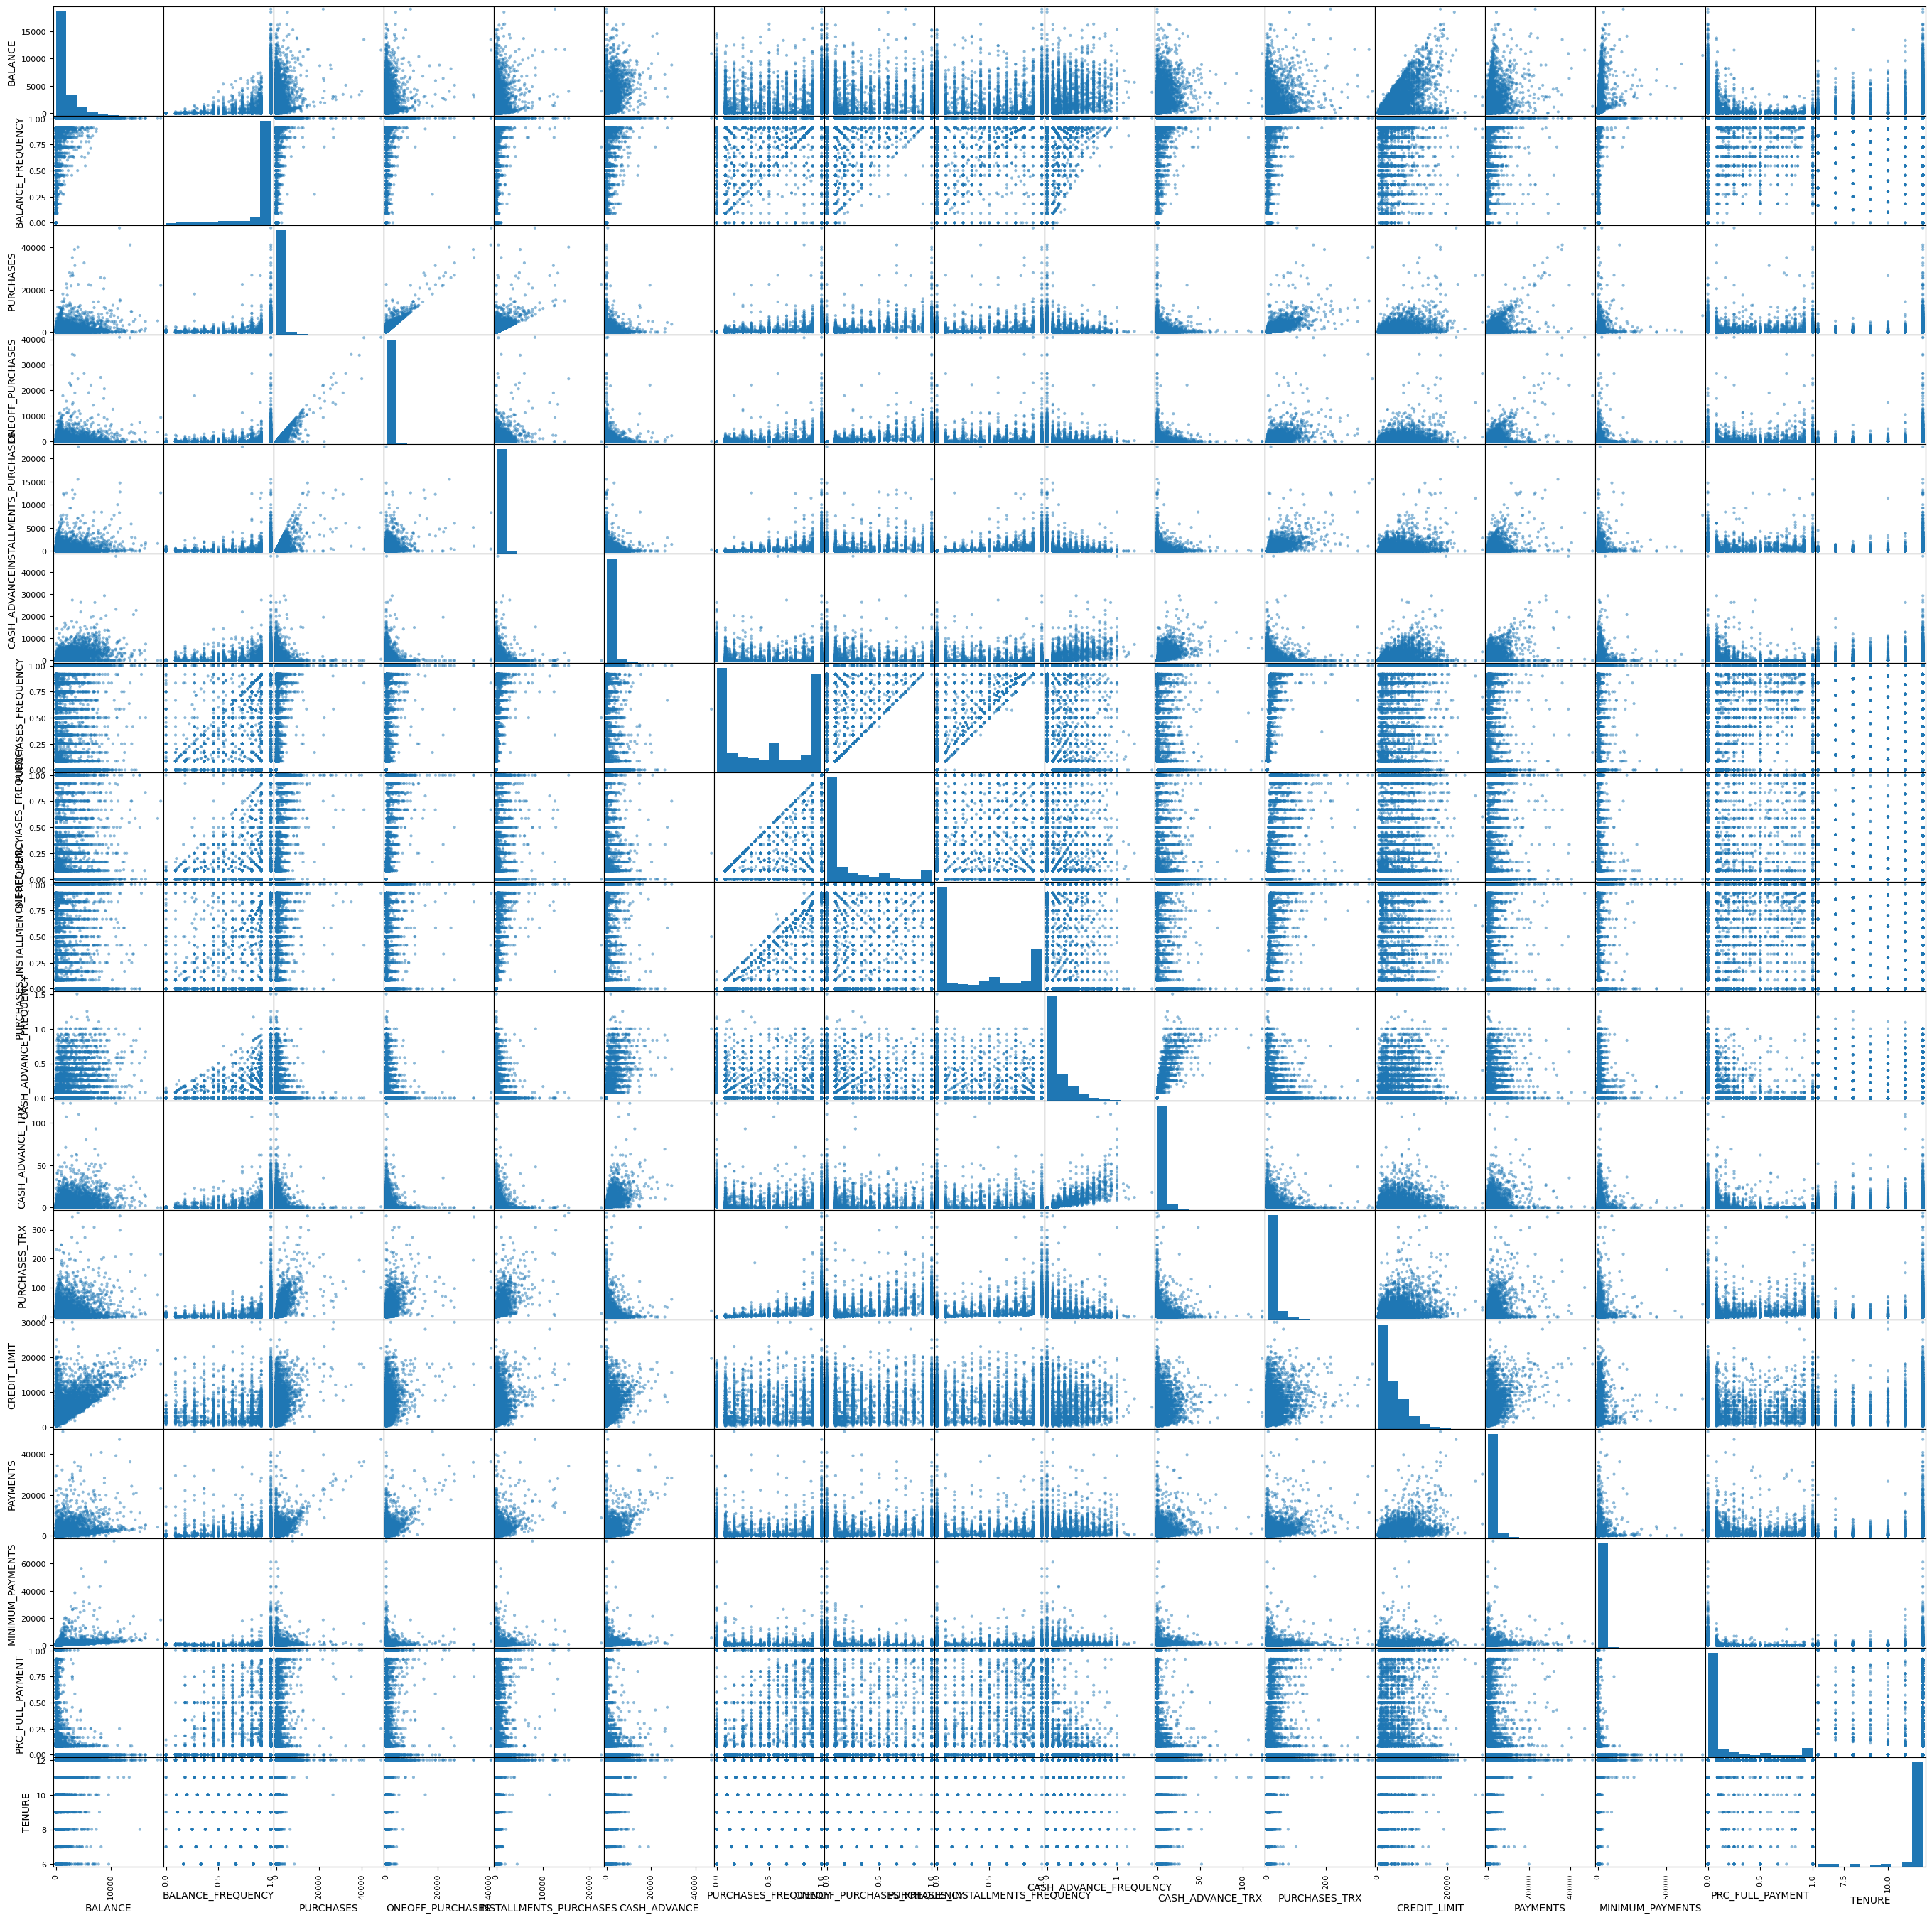

In [106]:
# Extraire les colonnes "Features" dans une variable X
dataset = dataset.fillna(dataset.mean()) # replace missing values with mean of column
X = dataset[['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']]

# Utiliser la fonction scatter_matrix de pandas pour afficher les nuages de points
pd.plotting.scatter_matrix(X, figsize=(34,34))
plt.show()

### Clustering

In [107]:
from sklearn.cluster import KMeans

In [108]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

In [109]:
wcss

[393060990475.35077,
 279296583114.4998,
 232806388755.72125,
 206554744259.4,
 182317282210.9898,
 161690898974.77872,
 145207283937.44302,
 132875899454.7452,
 124186954792.26385,
 117116796452.44727]

C:\Users\safae\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


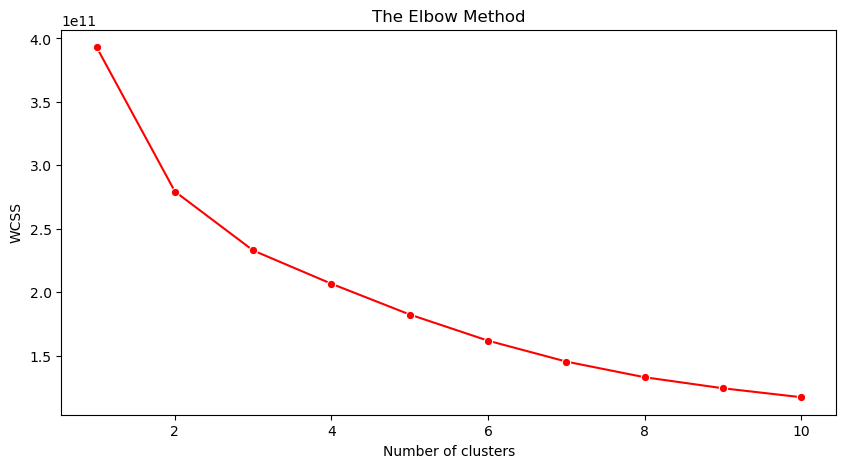

In [110]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red') 
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [111]:
# 3 cluster (wcss Elbow method)
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)


[0 1 1 ... 0 0 0]


C:\Users\safae\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\safae\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\safae\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\safae\Anacond

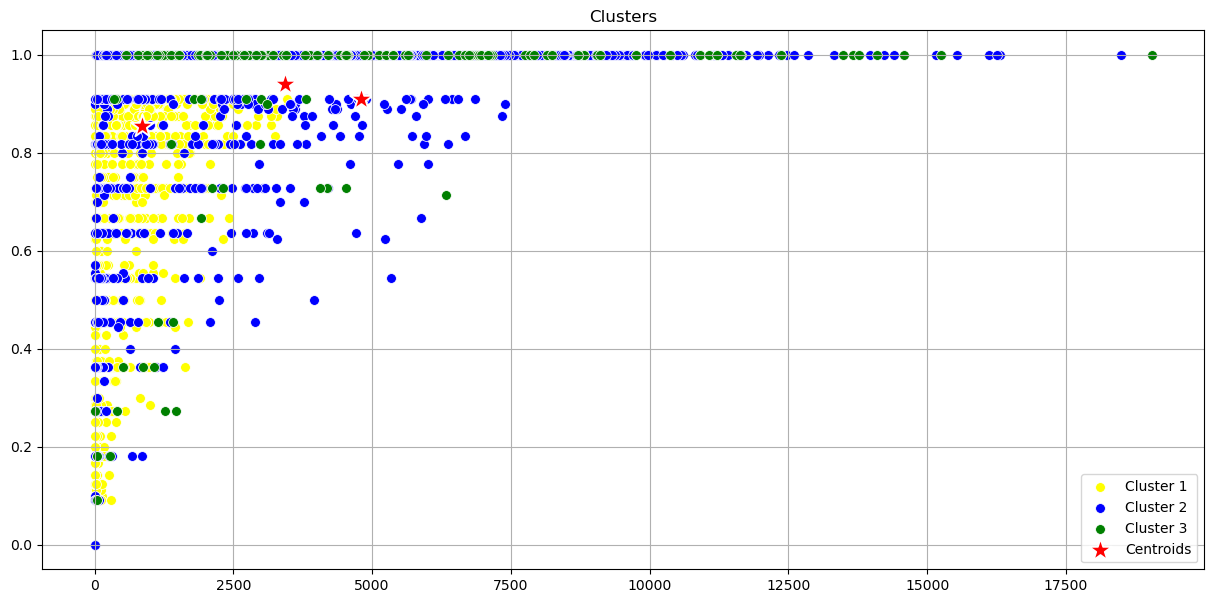

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,7))
sns.scatterplot(X.values[y_kmeans == 0, 0], X.values[y_kmeans == 0, 1],color = 'yellow', label ='Cluster 1',s=50)
sns.scatterplot(X.values[y_kmeans == 1, 0], X.values[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X.values[y_kmeans == 2, 0], X.values[y_kmeans == 2, 1], color = 'green', label ='Cluster 3',s=50)

sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red',label = 'Centroids',s=300,marker='*')

plt.title('Clusters')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()


### fuzzy cmeans

In [113]:
#pip install scikit-fuzzy
import skfuzzy as fuzz

In [114]:
#Normaliser les données :
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df)

In [115]:
#
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X.T, c=3, m=2, error=0.005, maxiter=1000, init=None)
print('Ici, c : est le nombre de clusters \n m : est la valeur de l exposant de la pondération floue \n error: est le critère d arrêt \n maxiter : est le nombre maximum d itérations \n init : est une matrice d initialisation optionnelle.')

Ici, c : est le nombre de clusters 
 m : est la valeur de l exposant de la pondération floue 
 error: est le critère d arrêt 
 maxiter : est le nombre maximum d itérations 
 init : est une matrice d initialisation optionnelle.


In [116]:
#Trouver les labels et le nombre de clusters :
labels = u.argmax(axis=0)
n_clusters = len(set(labels))

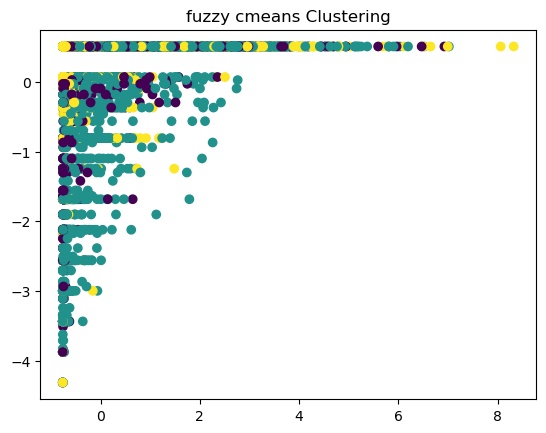

In [117]:
#Visualiser les clusters :
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=labels)
plt.title('fuzzy cmeans Clustering')
plt.show()

### DBSCAN

In [118]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [119]:
# Load dataset
df = pd.read_csv('CC GENERAL.csv',index_col='CUST_ID')
# Drop rows with missing values
df = df.dropna()
# Select the columns containing the features
X = df.iloc[:, 0:17].values

In [120]:
# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [121]:
# Apply DBSCAN algorithm
dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.8)

In [122]:
# Get the labels and the number of clusters
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

In [123]:
# Print the number of clusters and the labels
print("Number of clusters: ", n_clusters)
print("Labels: ", labels)


Number of clusters:  16
Labels:  [ 0 -1  0 ... -1 -1 -1]


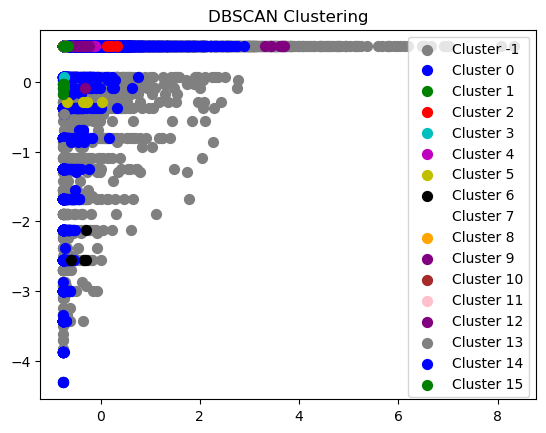

In [124]:
# Visualize the clusters
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple', 'brown','pink','purple','gray']
for i in range(-1, n_clusters):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], s=50, c=colors[i % len(colors)], label='Cluster {}'.format(i))
plt.title('DBSCAN Clustering')

plt.legend()
plt.show()

### DBSCAN with TSNE

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

In [126]:
# Load dataset
df = pd.read_csv('CC GENERAL.csv',index_col='CUST_ID')
# Drop rows with missing values
df = df.dropna()
# Select the columns containing the features
X = df.iloc[:, 0:17].values

In [127]:
# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [128]:
# Perform t-SNE to reduce the dimensionality of the dataset to 2
# Perform t-SNE clustering
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X)

C:\Users\safae\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [129]:
# Apply DBSCAN algorithm on the 2-dimensional dataset
dbscan = DBSCAN(eps=4, min_samples=5)
dbscan.fit(X_tsne)


DBSCAN(eps=4)

In [130]:
# Get the labels and the number of clusters
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

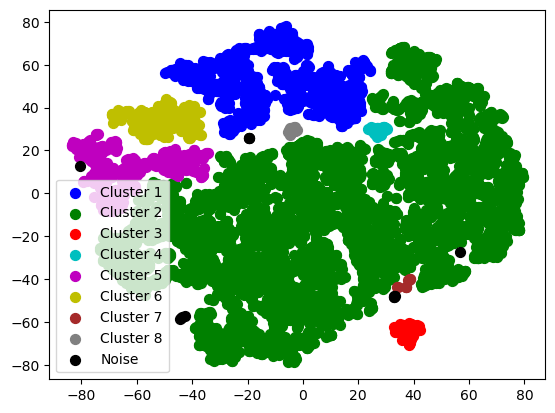

In [131]:
# Visualize the clusters
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'brown', 'gray','pink','purple' ]
for i in range(n_clusters):
    plt.scatter(X_tsne[labels == i, 0], X_tsne[labels == i, 1], s=50, c=colors[i % len(colors)], label=f'Cluster {i+1}')
plt.scatter(X_tsne[labels == -1, 0], X_tsne[labels == -1, 1], s=50, c='k', label='Noise')
plt.legend()
plt.show()

### Comparaison entre les algorithms

In [180]:
from sklearn.metrics import silhouette_score
import skfuzzy as fuzz


In [221]:
# Create a list of clustering algorithms
algorithms = [
    KMeans(n_clusters=3),
    DBSCAN(eps=10 ,min_samples=20),
    fuzz.cluster.cmeans(X.T, c=3, m=2, error=0.005, maxiter=1000)[1].argmax(axis=0)
]

# Create a list of algorithm names
algorithm_names = ['KMeans', 'DBSCAN', 'FuzzyCMeans']



In [226]:
# Calculate the silhouette score for each algorithm and store the results in a dictionary
silhouette_scores = {}
for i, algorithm in enumerate(algorithms):
    if algorithm_names[i] == 'DBSCAN':
        algorithm.fit(X_tsne)
        labels = algorithm.labels_
    elif algorithm_names[i] == 'FuzzyCMeans':
        labels = algorithm
    else:
        labels = algorithm.fit_predict(X)
    if (len(set(labels)) > 1 and i==1):
        silhouette_scores[algorithm_names[i]] = silhouette_score(X_tsne, labels)
    elif (len(set(labels)) > 1 ) and i!=1:
        silhouette_scores[algorithm_names[i]] = silhouette_score(X, labels)
    else:
        silhouette_scores[algorithm_names[i]] = np.nan
silhouette_scores   
        


{'KMeans': 0.4649592292907119,
 'DBSCAN': 0.13853434,
 'FuzzyCMeans': 0.3395275408763446}

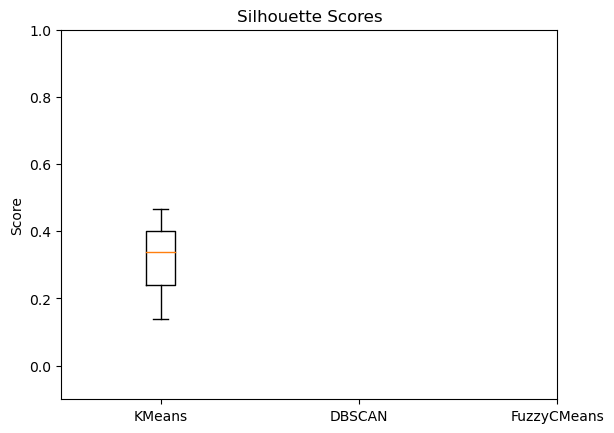

In [227]:
# Plot a box plot of the silhouette scores
# Set y-axis limits
plt.ylim(-0.1, 1)
plt.boxplot(silhouette_scores.values())
plt.xticks(range(1, len(silhouette_scores)+1), list(silhouette_scores.keys()))
plt.title('Silhouette Scores')
plt.ylabel('Score')
plt.show()



In [233]:
print('Interpretation: \n Le résultat indique les scores de silhouette pour trois algorithmes de clustering différents:KMeans, DBSCAN et FuzzyCMeans.\n Le score de silhouette mesure la qualité de la séparation des clusters, avec des valeurs proches de 1 indiquant une bonne séparation et des valeurs proches de 0 indiquant une mauvaise séparation.\n Le score de silhouette pour KMeans est de 0,46, ce qui indique une séparation relativement bonne des clusters. Le score de silhouette pour DBSCAN est de 0,14, ce qui indique une séparation plus faible des clusters. Le score de silhouette pour FuzzyCMeans est de 0,34, ce qui indique une séparation intermédiaire des clusters.')

Interpretation: 
 Le résultat indique les scores de silhouette pour trois algorithmes de clustering différents:KMeans, DBSCAN et FuzzyCMeans.
 Le score de silhouette mesure la qualité de la séparation des clusters, avec des valeurs proches de 1 indiquant une bonne séparation et des valeurs proches de 0 indiquant une mauvaise séparation.
 Le score de silhouette pour KMeans est de 0,46, ce qui indique une séparation relativement bonne des clusters. Le score de silhouette pour DBSCAN est de 0,14, ce qui indique une séparation plus faible des clusters. Le score de silhouette pour FuzzyCMeans est de 0,34, ce qui indique une séparation intermédiaire des clusters.
